   assessment   age  shape  margin  density  severity
0         5.0  67.0    3.0     5.0      3.0         1
1         4.0  43.0    1.0     1.0      NaN         1
2         5.0  58.0    4.0     5.0      3.0         1
3         4.0  28.0    1.0     1.0      3.0         0
4         5.0  74.0    1.0     5.0      NaN         1
assessment     4.348279
age           55.487448
shape          2.721505
margin         2.796276
density        2.910734
severity       0.463059
dtype: float64
[[113  16]
 [ 24  88]]
0.8340248962655602


<AxesSubplot:>

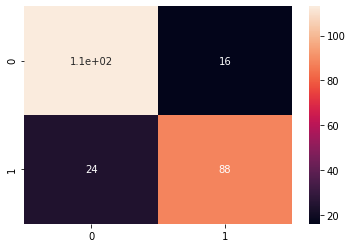

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_csv("project.data", header= None, names = ['assessment','age','shape','margin','density','severity'], na_values= '?')
print(data.head())
print(data.mean())
positive = data.loc[data.severity.eq(1)]
negative = data.loc[data.severity.eq(0)]
data.loc[data.severity.eq(1)] = data.fillna(positive.mean())
data.loc[data.severity.eq(0)] = data.fillna(negative.mean())
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, Y_train)


# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier.fit(X_train, Y_train)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

print(cm)

print((cm[0,0] + cm[1,1]) / np.sum(cm))

sns.heatmap(cm, annot= True)

<AxesSubplot:>

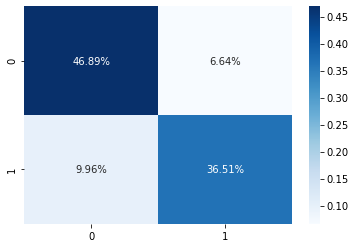

In [2]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:xlabel='density', ylabel='shape'>

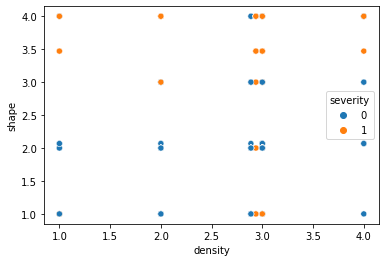

In [17]:
sns.scatterplot(data = data, x = "density", y = "shape", hue = 'severity' )